<a href="https://colab.research.google.com/github/scaairesearch/da_cv_fer/blob/main/experiment_model_improvement_v5_SE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective
 - creating versions for non_dann, dann and dann_ewc
 - Improve accuracy of base model - classification task
 - use Squeeze and Excite on basic pretrained models to check accuracy - https://www.robots.ox.ac.uk/~albanie/pytorch-models.html - VGG vgg_vd_face_sfew (weights)
 - Previously from v5
    - can achieve more than 56% accuracy
    - lr of 0.001 gives good accuarcy
Observations
  - ...
  


Next Steps
  - lr finder
  -
Models
  - XX_04
  -

## Initializations
Cloning Repo, Dependencies installation, Libraries import and Config Initialization

### Cloning Repo, Installing dependencies

In [1]:
!git clone https://github.com/scaairesearch/da_cv_fer
import os
os.getcwd()
os.chdir('da_cv_fer')

Cloning into 'da_cv_fer'...
remote: Enumerating objects: 470, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 470 (delta 143), reused 157 (delta 81), pack-reused 209
Receiving objects: 100% (470/470), 32.45 MiB | 21.66 MiB/s, done.
Resolving deltas: 100% (257/257), done.


In [2]:
!pip install -q -r requirements.txt # -q is for quiet install
# for some reason the below does not get installed with requirements
!pip install -q opendatasets
!pip install -q facenet_pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.7/301.7 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.7/225.7 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.4/173.4 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [3]:
# Installs from files
from da_cv_fer.data_config import DataConfig
# from da_cv_fer.ds_sfew import DatasetSFEW
from da_cv_fer.ds_sfew_crop import DatasetSFEWCROP
# from da_cv_fer.ds_expw_crop import EXPWCROP
# from da_cv_fer.ds_expw import EXPW
from da_cv_fer.utils import *
# from da_cv_fer.model_DANN import DANN
# from da_cv_fer.model_DANN_Bespoke import DANNBespoke
from da_cv_fer.run_config import RunConfig
# from da_cv_fer.train import *
import os
import zipfile

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau

from tqdm import tqdm # for beautiful model training updates

import matplotlib.pyplot as plt # for plots

import time
from pathlib import Path

from copy import deepcopy
import numpy as np


### Initializing Configs

In [4]:
#initializing dataconfig, it tells us about dataset configuration and directory structure
dataconfig = DataConfig()

##  Dataset
- SFEW Dataset
- Creating Dataloader object


In [5]:
# Mounting Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Creating Dataloader

In [6]:
sfew = DatasetSFEWCROP()
sfew_train_loader, sfew_val_loader = sfew.get_dataloader()
print(f' length of SFEW dataset : {len(sfew_train_loader.dataset)}')

 self.BASE_PATH -dataset, 
 self.EXTRACT_DIR-dataset/sfew,
 self.ZIP_FILE_PATH - dataset/SFEW_2.zip 
Directory dataset/sfew created successfully.
No files (including zip file) found in dataset/sfew.Copying file
Starting File copying from /content/gdrive/MyDrive/CV_FER/dataset/SFEW_2.zip to dataset/sfew
File copied successfully from /content/gdrive/MyDrive/CV_FER/dataset/SFEW_2.zip to dataset/sfew
Initiating extraction of dataset/sfew/SFEW_2.zip to dataset/sfew
...completed for dataset/sfew/SFEW_2.zip
dataset/sfew/Train Fear.zip Fear
...completed for dataset/sfew/Train/Fear.zip
dataset/sfew/Train Sad.zip Sad
...completed for dataset/sfew/Train/Sad.zip
dataset/sfew/Train Neutral.zip Neutral
...completed for dataset/sfew/Train/Neutral.zip
dataset/sfew/Train Surprise.zip Surprise
...completed for dataset/sfew/Train/Surprise.zip
dataset/sfew/Train Angry.zip Angry
...completed for dataset/sfew/Train/Angry.zip
dataset/sfew/Train Happy.zip Happy
...completed for dataset/sfew/Train/Happy.zip
da

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


### Example Images

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


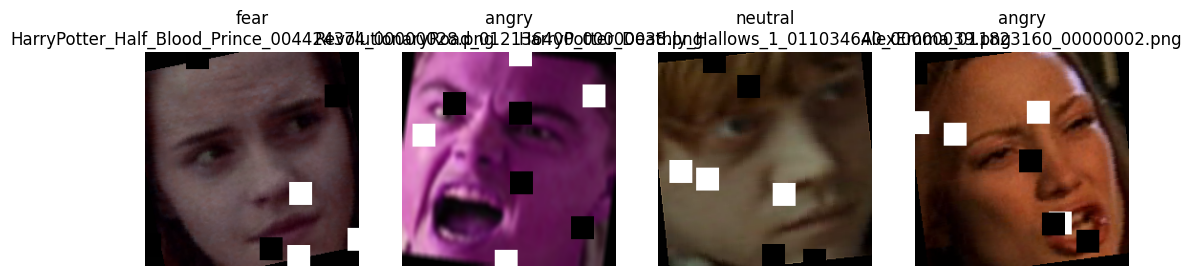

In [7]:
show_batch(sfew_train_loader,sfew.labels,4, normalized = False)

In [8]:
sfew_loader = {'name': 'sfew',
               'train':sfew_train_loader,
               'val':sfew_val_loader
               }
data_loader = {'source' : sfew_loader}
source_name = data_loader['source']['name']

## Model Initialization

### Simple Model_V5_SE
- including dann
- including grl
- including SE

In [9]:

import torch
import torch.nn as nn
from torch.autograd import Function
import torch.nn.functional as F


class Vgg_vd_face_sfew_dag(nn.Module):

    def __init__(self):
        super(Vgg_vd_face_sfew_dag, self).__init__()
        self.meta = {'mean': [129.186279296875, 104.76238250732422, 93.59396362304688],
                     'std': [1, 1, 1],
                     'imageSize': [224, 224, 3]}
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu1_1 = nn.ReLU()
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu1_2 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu2_1 = nn.ReLU()
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu2_2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu3_1 = nn.ReLU()
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu3_2 = nn.ReLU()
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu3_3 = nn.ReLU()
        self.pool3 = nn.MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu4_1 = nn.ReLU()
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu4_2 = nn.ReLU()
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu4_3 = nn.ReLU()
        self.pool4 = nn.MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu5_1 = nn.ReLU()
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu5_2 = nn.ReLU()
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size=[3, 3], stride=(1, 1), padding=(1, 1))
        self.relu5_3 = nn.ReLU()
        self.pool5 = nn.MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
        self.fc6 = nn.Conv2d(512, 4096, kernel_size=[7, 7], stride=(1, 1))
        self.relu6 = nn.ReLU()
        self.fc7 = nn.Linear(in_features=4096, out_features=4096, bias=True)
        self.relu7 = nn.ReLU()
        self.fc8 = nn.Linear(in_features=4096, out_features=7, bias=True)

    def forward(self, data):
        x1 = self.conv1_1(data)
        x2 = self.relu1_1(x1)
        x3 = self.conv1_2(x2)
        x4 = self.relu1_2(x3)
        x5 = self.pool1(x4)
        x6 = self.conv2_1(x5)
        x7 = self.relu2_1(x6)
        x8 = self.conv2_2(x7)
        x9 = self.relu2_2(x8)
        x10 = self.pool2(x9)
        x11 = self.conv3_1(x10)
        x12 = self.relu3_1(x11)
        x13 = self.conv3_2(x12)
        x14 = self.relu3_2(x13)
        x15 = self.conv3_3(x14)
        x16 = self.relu3_3(x15)
        x17 = self.pool3(x16)
        x18 = self.conv4_1(x17)
        x19 = self.relu4_1(x18)
        x20 = self.conv4_2(x19)
        x21 = self.relu4_2(x20)
        x22 = self.conv4_3(x21)
        x23 = self.relu4_3(x22)
        x24 = self.pool4(x23)
        x25 = self.conv5_1(x24)
        x26 = self.relu5_1(x25)
        x27 = self.conv5_2(x26)
        x28 = self.relu5_2(x27)
        x29 = self.conv5_3(x28)
        x30 = self.relu5_3(x29)
        x31 = self.pool5(x30)
        x32 = self.fc6(x31) # this is a conv layer, this is the output we need
        x33_preflatten = self.relu6(x32)
        x33 = x33_preflatten.view(x33_preflatten.size(0), -1)
        x34 = self.fc7(x33)
        x35 = self.relu7(x34)
        prediction = self.fc8(x35)
        return prediction


def vgg_vd_face_sfew_dag(weights_path=None, **kwargs):
    """
    load imported model instance

    Args:
        weights_path (str): If set, loads model weights from the given path
    """
    model = Vgg_vd_face_sfew_dag()
    if weights_path:
        state_dict = torch.load(weights_path)
        model.load_state_dict(state_dict)
    return model

In [10]:
model_pretrained = vgg_vd_face_sfew_dag(weights_path="/content/gdrive/MyDrive/CV_FER/weights/vgg_vd_face_sfew_dag.pth")

In [11]:
model_pretrained

Vgg_vd_face_sfew_dag(
  (conv1_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_1): ReLU()
  (conv1_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_2): ReLU()
  (pool1): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
  (conv2_1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_1): ReLU()
  (conv2_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_2): ReLU()
  (pool2): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
  (conv3_1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_1): ReLU()
  (conv3_2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_2): ReLU()
  (conv3_3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3_3): ReLU()
  (pool3): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_m

In [12]:
# list_class_classifer = list(model_pretrained.children())[:-4]
# # list_class_classifer.insert(2, nn.Dropout(0.1))
# list_class_classifer.insert(-1, nn.Dropout(0.1))
# list_class_classifer

In [7]:
# list(model_pretrained.children())[-4:-1]

[ReLU(), Linear(in_features=4096, out_features=4096, bias=True), ReLU()]

In [13]:
import torch.nn as nn
import torch
from torch.autograd import Function
import torch.nn.functional as F


class SEBlock(nn.Module):
    def __init__(self, in_channels, reduction_ratio=16):
        super(SEBlock, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Sequential(
            nn.Linear(in_channels, in_channels // reduction_ratio),
            nn.ReLU(inplace=True),
            nn.Linear(in_channels // reduction_ratio, in_channels),
            nn.Sigmoid()
        )

    def forward(self, x):
        batch_size, num_channels, _, _ = x.size()
        y = self.avg_pool(x).view(batch_size, num_channels)
        y = self.fc(y).view(batch_size, num_channels, 1, 1)
        return x * y.expand_as(x)

class GradientReversalFn(Function):
    @staticmethod
    def forward(ctx, x, alpha):
        ctx.alpha = alpha

        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        output = grad_output.neg() * ctx.alpha

        return output, None

class DANN_VGG_SE(nn.Module):
    def __init__(self,
                 model_pretrained = model_pretrained,
                 num_classes=7,
                 dropout_rate = 0.1,
                 ):
        super(DANN_VGG_SE, self).__init__()
        #---------------------Feature Extractor Network------------------------#
        list_feature_extractor = list(model_pretrained.children())[:-4]

        # SE Block
        self.se_block = SEBlock(512)
        list_feature_extractor.insert(-1,  self.se_block)
        self.feature_extractor = nn.Sequential(*list_feature_extractor)


        # self.feature_extractor = nn.Sequential(*list(model_pretrained.children())[:-4])

        #---------------------Class Classifier------------------------#
        list_class_classifer = list(model_pretrained.children())[-4:]
        list_class_classifer.insert(2, nn.Dropout(dropout_rate))
        # self.class_classifier = nn.Sequential(*list(model_pretrained.children())[-4:])
        self.class_classifier = nn.Sequential(*list_class_classifer)



        #---------------------Domain Classifier------------------------#

        self.domain_classifier = nn.Sequential(nn.ReLU(),
                                               nn.Linear(4096, 4096),
                                               nn.Dropout(dropout_rate),
                                               nn.ReLU(),
                                               nn.Linear(4096, 2)
                                               )

        # Initialize the 4096,4096 to pre-trained
        pretrained_weights = model_pretrained.fc7.weight
        pretrained_biases = model_pretrained.fc7.bias
        with torch.no_grad():
          self.domain_classifier[1].weight.copy_(pretrained_weights)
          self.domain_classifier[1].bias.copy_(pretrained_biases)


    def forward(self, input_data, alpha = 0.0):
        features = self.feature_extractor(input_data)
        # print("features.shape......", features.shape)
        features = features.view(-1,features.size(1))
        # print("features.shape after view......", features.shape)

        reverse_features = GradientReversalFn.apply(features,alpha)

        class_output = self.class_classifier(features)
        domain_output = self.domain_classifier(reverse_features)

        return class_output, domain_output, features


In [14]:
model = DANN_VGG_SE(model_pretrained = model_pretrained, num_classes=7)
from torchsummary import summary  #for model summary and params
print(model)

DANN_VGG_SE(
  (se_block): SEBlock(
    (avg_pool): AdaptiveAvgPool2d(output_size=1)
    (fc): Sequential(
      (0): Linear(in_features=512, out_features=32, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=32, out_features=512, bias=True)
      (3): Sigmoid()
    )
  )
  (feature_extractor): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 

In [15]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [16]:
from torchsummary import summary

summary(model.to(device), (3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [ ]:
# !pip install torch-summary

In [ ]:
# from torchsummary import summary
# summary(model, (3, 224, 224), col_names = ["input_size", "output_size", "num_params", "kernel_size", "mult_adds"], verbose =2 )

## Checking accuracy before fine tuning

In [17]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

cuda


In [18]:
model = model.to(device=device)

### Test Function

In [19]:
def get_correct_preds(prediction, labels):
    """
    Function to return total number of correct predictions
    :param prediction: Model predictions on a given sample of data
    :param labels: Correct labels of a given sample of data
    :return: Number of correct predictions
    """
    return prediction.argmax(dim=1).eq(labels.argmax(dim=1)).sum().item()

In [20]:
def test_model_local(model, device, data_loader, mode= 'test',
               class_loss_function = nn.CrossEntropyLoss() ):
    model.eval() # evaluation mode

    # variables to track loss and accuracy
    test_loss = 0.0
    correct = 0

    # Disable gradient updation
    with torch.no_grad():
        # Iterate over each batch and fetch images and labels from the batch
        for batch_idx, batch in enumerate(data_loader):
            images, labels = batch[0].to(device), batch[1].to(device)

            class_output,_,_  = model((images*255)) # forward pass, output = {class}
            class_loss = class_loss_function(class_output,labels) # Calculate Loss

            test_loss += class_loss.item() # sum up batch loss

            # Sum up batch correct predictions
            correct += get_correct_preds(class_output, labels)

    # Calculate test loss for a epoch
    test_loss /= len(data_loader.dataset)

    print('Test / Val: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(test_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))


    return correct, test_loss

#### Pre fine train metric

In [21]:
correct, test_loss = test_model_local(model, device, data_loader['source']['val'], mode= 'test')
correct, test_loss

Test / Val: Average loss: 0.3109, Accuracy: 113/419 (26.97%)



(113, 0.3109036174765066)

### Train Function

#### Basic Training Function

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch.nn.functional as F

def train_model_local(model, train_loader, criterion, optimizer, device='cuda'):
    model.to(device)
    model.train()
    # for epoch in range(num_epochs):
    running_loss = 0.0
    correct = 0

    for inputs, labels,_ in train_loader:
        inputs = inputs * 255.0  # Convert inputs from [0, 1] to [0, 255]
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs,_,_ = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        correct += get_correct_preds(outputs, labels)


    epoch_loss = running_loss / len(train_loader.dataset)
    length_dataset = len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy : {correct}/{length_dataset} Or {100. * correct / length_dataset: .2f} %')

    return



#### Training Function with LR Scheduler

In [23]:
def train_model_local_lr(model,device, data_loader, optimizer, epoch,
                class_loss_function = nn.CrossEntropyLoss() ):
    print(f'epoch = {epoch+1}...in training function')
    model.to(device)
    model.train() # setting model to training


    pbar = tqdm(data_loader) # putting the dataloader in progress bar

    processed = 0 # to understand accuracy, used in denominator
    epoch_loss = 0.0
    correct = 0

    for batch_idx, batch in enumerate(pbar):
        batch[0] = batch[0] * 255.0  # Convert inputs from [0, 1] to [0, 255]
        images, labels = batch[0].to(device), batch[1].to(device) # batch of images and labels


        optimizer.zero_grad() # setting gradients to zero to avoid accumulation

        class_output, _ , _ = model(images) # forward pass, output = {class, domain, feature}

        class_loss = class_loss_function(class_output,labels) # Calculate Loss
        epoch_loss += class_loss.item()
        # Sum up batch correct predictions
        correct += get_correct_preds(class_output, labels)

        class_loss.backward() #backpropogation, creating gradients

        optimizer.step() # updating the params

        processed += len(images)
        curr_lr = optimizer.param_groups[0]['lr']

        pbar.set_description(desc= f'Loss={class_loss.item()} Accuracy={correct}/{processed}({100*correct/processed:0.2f}%) Epoch Avg loss={epoch_loss/processed:0.8f} LR={curr_lr:0.6f}')

    return float("{:.8f}".format(epoch_loss/processed)),  curr_lr


In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

### Execution without Learning Rate

In [ ]:
# num_epochs=55
# for epoch in range(num_epochs):
#   train_model_local(model = model, train_loader = data_loader['source']['train'], criterion = criterion, optimizer=optimizer)
#   test_model_local(model, device, data_loader['source']['val'], class_loss_function= criterion, mode= 'test')
# print('Training finished.')

### Execution with LR

In [25]:
runconfig = RunConfig()
device = runconfig.device

model = DANN_VGG_SE(model_pretrained = model_pretrained, num_classes=7).to(device=device)
best_model = DANN_VGG_SE(model_pretrained = model_pretrained, num_classes=7).to(device=device)

#learning rate
lr =  0.001 #float(runconfig.inital_lr)

# Epochs
EPOCHS = runconfig.NUM_EPOCHS
# EPOCHS = 2 #override
print("EPOCHS", EPOCHS)

# ReduceLRonPlateau Scheduler Params
scheduler_patience = 8 #runconfig.scheduler_patience
scheduler_factor = runconfig.scheduler_factor
scheduler_threshold = 25 #runconfig.scheduler_threshold

# Early stopping params
early_stop_patience = 10 #runconfig.early_stop_patience
early_stop_difference = 15 #runconfig.early_stop_difference

# optimizer
optimizer = optim.SGD(model.parameters(), lr = lr, momentum = 0.9)

#optimizer with weight decay (L2 regularization)
# optimizer = optim.SGD(non_dann_model.parameters(), lr = lr, momentum = 0.9, weight_decay= 0.0001)

# Set up the ReduceLROnPlateau scheduler
scheduler = ReduceLROnPlateau(optimizer,
                              # mode='min',
                              mode='max',
                              factor=scheduler_factor,
                              patience=scheduler_patience,
                              threshold = scheduler_threshold,
                              threshold_mode='abs',
                              min_lr=1e-6,
                              verbose= True)

# Initialize variables to track the best validation loss and the best model state
best_val_loss = float('inf')
best_val_acc = 0
best_model_state = None

# loss functions
criterion_class = (runconfig.criterion_class).to(device=device)
# criterion_domain = (runconfig.criterion_domain).to(device=device)

# loss accumulation
train_losses = [] # to capture train losses over training epochs
val_losses = [] # to capture validation loss over epochs
lr_schedule = [] # to capture learning rate over epochs
epoch_converge = 0 #TODO: run config based
list_val_correct = [] # to capture validation accuracy over epochs
list_best_val_correct = [] # to capture best validtion accuracy over epochs

EPOCHS 150


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


------ Training started for Non DANN Model ---- 
starting LR : 0.001
EPOCH: 1  of  150
epoch = 1...in training function


  0%|          | 0/58 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Loss=2.1919596195220947 Accuracy=298/913(32.64%) Epoch Avg loss=0.12010010 LR=0.001000: 100%|██████████| 58/58 [00:23<00:00,  2.43it/s]


Test / Val: Average loss: 0.1066, Accuracy: 177/419 (42.24%)

last correct =177 | best correct = 0
Updated the best model with correct: 177



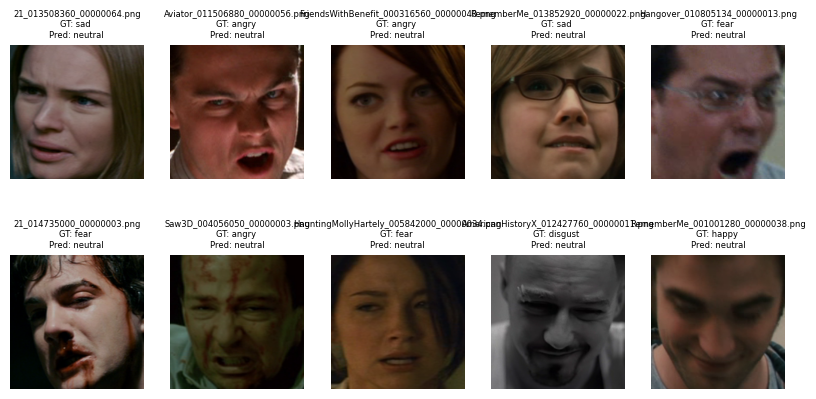

EPOCH: 2  of  150
epoch = 2...in training function


Loss=0.4254704415798187 Accuracy=421/913(46.11%) Epoch Avg loss=0.09286230 LR=0.001000: 100%|██████████| 58/58 [00:23<00:00,  2.44it/s]


Test / Val: Average loss: 0.1034, Accuracy: 181/419 (43.20%)

last correct =181 | best correct = 177
Updated the best model with correct: 181

EPOCH: 3  of  150
epoch = 3...in training function


Loss=1.018620252609253 Accuracy=462/913(50.60%) Epoch Avg loss=0.08624449 LR=0.001000: 100%|██████████| 58/58 [00:24<00:00,  2.41it/s]


Test / Val: Average loss: 0.0986, Accuracy: 197/419 (47.02%)

last correct =197 | best correct = 181
Updated the best model with correct: 197

EPOCH: 4  of  150
epoch = 4...in training function


Loss=0.13097304105758667 Accuracy=508/913(55.64%) Epoch Avg loss=0.08154626 LR=0.001000: 100%|██████████| 58/58 [00:23<00:00,  2.42it/s]


Test / Val: Average loss: 0.1009, Accuracy: 196/419 (46.78%)

last correct =196 | best correct = 197
EPOCH: 5  of  150
epoch = 5...in training function


Loss=1.776455283164978 Accuracy=513/913(56.19%) Epoch Avg loss=0.07798834 LR=0.001000: 100%|██████████| 58/58 [00:24<00:00,  2.41it/s]


Test / Val: Average loss: 0.0965, Accuracy: 211/419 (50.36%)

last correct =211 | best correct = 197
Updated the best model with correct: 211

EPOCH: 6  of  150
epoch = 6...in training function


Loss=4.561110973358154 Accuracy=594/913(65.06%) Epoch Avg loss=0.07149334 LR=0.001000: 100%|██████████| 58/58 [00:23<00:00,  2.42it/s]


Test / Val: Average loss: 0.1002, Accuracy: 190/419 (45.35%)

last correct =190 | best correct = 211
EPOCH: 7  of  150
epoch = 7...in training function


Loss=0.2145773023366928 Accuracy=466/913(51.04%) Epoch Avg loss=0.08438831 LR=0.001000: 100%|██████████| 58/58 [00:23<00:00,  2.43it/s]


Test / Val: Average loss: 0.0955, Accuracy: 221/419 (52.74%)

last correct =221 | best correct = 211
Updated the best model with correct: 221

EPOCH: 8  of  150
epoch = 8...in training function


Loss=1.0343904495239258 Accuracy=580/913(63.53%) Epoch Avg loss=0.06737108 LR=0.001000: 100%|██████████| 58/58 [00:24<00:00,  2.42it/s]


Test / Val: Average loss: 0.1045, Accuracy: 200/419 (47.73%)

last correct =200 | best correct = 221
EPOCH: 9  of  150
epoch = 9...in training function


Loss=0.2314545214176178 Accuracy=623/913(68.24%) Epoch Avg loss=0.05808518 LR=0.001000: 100%|██████████| 58/58 [00:23<00:00,  2.43it/s]


Test / Val: Average loss: 0.1005, Accuracy: 213/419 (50.84%)

last correct =213 | best correct = 221
EPOCH: 10  of  150
epoch = 10...in training function


Loss=1.935027837753296 Accuracy=658/913(72.07%) Epoch Avg loss=0.05307422 LR=0.001000: 100%|██████████| 58/58 [00:23<00:00,  2.42it/s]


Test / Val: Average loss: 0.0967, Accuracy: 219/419 (52.27%)

last correct =219 | best correct = 221
EPOCH: 11  of  150
epoch = 11...in training function


Loss=0.05643573775887489 Accuracy=666/913(72.95%) Epoch Avg loss=0.05097966 LR=0.001000: 100%|██████████| 58/58 [00:23<00:00,  2.42it/s]


Test / Val: Average loss: 0.1088, Accuracy: 221/419 (52.74%)

last correct =221 | best correct = 221


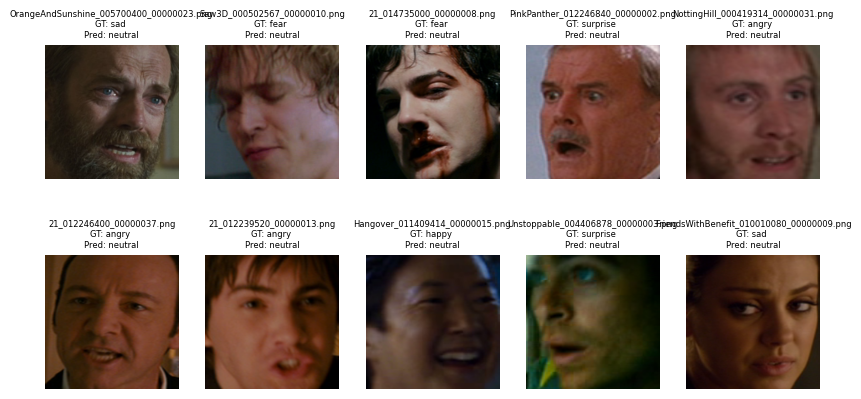

EPOCH: 12  of  150
epoch = 12...in training function


Loss=1.0018737316131592 Accuracy=691/913(75.68%) Epoch Avg loss=0.04816180 LR=0.001000: 100%|██████████| 58/58 [00:24<00:00,  2.41it/s]


Test / Val: Average loss: 0.1085, Accuracy: 215/419 (51.31%)

last correct =215 | best correct = 221
EPOCH: 13  of  150
epoch = 13...in training function


Loss=0.5019468069076538 Accuracy=661/913(72.40%) Epoch Avg loss=0.05298714 LR=0.001000: 100%|██████████| 58/58 [00:24<00:00,  2.41it/s]


Test / Val: Average loss: 0.1076, Accuracy: 229/419 (54.65%)

last correct =229 | best correct = 221
Updated the best model with correct: 229

EPOCH: 14  of  150
epoch = 14...in training function


Loss=0.44420745968818665 Accuracy=671/913(73.49%) Epoch Avg loss=0.05058252 LR=0.001000: 100%|██████████| 58/58 [00:24<00:00,  2.40it/s]


Test / Val: Average loss: 0.1125, Accuracy: 185/419 (44.15%)

last correct =185 | best correct = 229
EPOCH: 15  of  150
epoch = 15...in training function


Loss=0.03929311782121658 Accuracy=723/913(79.19%) Epoch Avg loss=0.03929479 LR=0.000200: 100%|██████████| 58/58 [00:24<00:00,  2.40it/s]


Test / Val: Average loss: 0.1114, Accuracy: 201/419 (47.97%)

last correct =201 | best correct = 229
EPOCH: 16  of  150
epoch = 16...in training function


Loss=0.50477135181427 Accuracy=777/913(85.10%) Epoch Avg loss=0.02918351 LR=0.000200: 100%|██████████| 58/58 [00:24<00:00,  2.42it/s]


Test / Val: Average loss: 0.1178, Accuracy: 208/419 (49.64%)

last correct =208 | best correct = 229
EPOCH: 17  of  150
epoch = 17...in training function


Loss=0.12214905768632889 Accuracy=793/913(86.86%) Epoch Avg loss=0.02627429 LR=0.000200: 100%|██████████| 58/58 [00:24<00:00,  2.40it/s]


Test / Val: Average loss: 0.1257, Accuracy: 206/419 (49.16%)

last correct =206 | best correct = 229
EPOCH: 18  of  150
epoch = 18...in training function


Loss=0.014183077029883862 Accuracy=807/913(88.39%) Epoch Avg loss=0.02239819 LR=0.000200: 100%|██████████| 58/58 [00:24<00:00,  2.40it/s]


Test / Val: Average loss: 0.1275, Accuracy: 224/419 (53.46%)

last correct =224 | best correct = 229
EPOCH: 19  of  150
epoch = 19...in training function


Loss=0.08698824048042297 Accuracy=810/913(88.72%) Epoch Avg loss=0.02302391 LR=0.000200: 100%|██████████| 58/58 [00:24<00:00,  2.38it/s]


Test / Val: Average loss: 0.1254, Accuracy: 219/419 (52.27%)

last correct =219 | best correct = 229
EPOCH: 20  of  150
epoch = 20...in training function


Loss=0.000747877755202353 Accuracy=808/913(88.50%) Epoch Avg loss=0.02161768 LR=0.000200: 100%|██████████| 58/58 [00:24<00:00,  2.37it/s]


Test / Val: Average loss: 0.1299, Accuracy: 221/419 (52.74%)

last correct =221 | best correct = 229
EPOCH: 21  of  150
epoch = 21...in training function


Loss=0.24964649975299835 Accuracy=805/913(88.17%) Epoch Avg loss=0.02297159 LR=0.000200: 100%|██████████| 58/58 [00:24<00:00,  2.34it/s]


Test / Val: Average loss: 0.1186, Accuracy: 224/419 (53.46%)

last correct =224 | best correct = 229


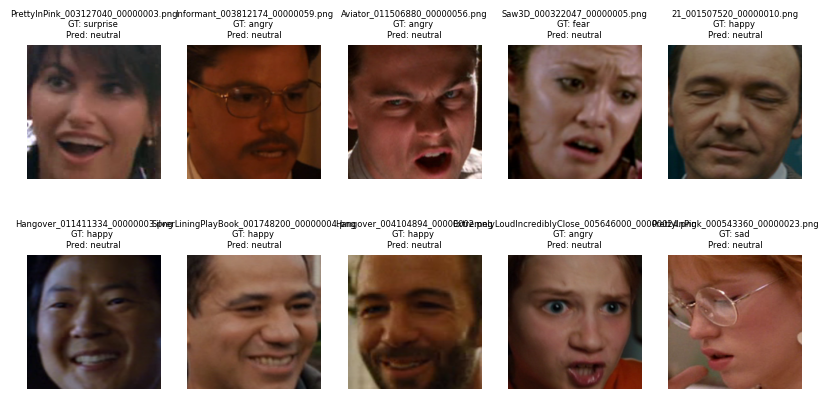

EPOCH: 22  of  150
epoch = 22...in training function


Loss=0.6259387135505676 Accuracy=811/913(88.83%) Epoch Avg loss=0.02127966 LR=0.000200: 100%|██████████| 58/58 [00:24<00:00,  2.39it/s]


Test / Val: Average loss: 0.1208, Accuracy: 214/419 (51.07%)

last correct =214 | best correct = 229
EPOCH: 23  of  150
epoch = 23...in training function


Loss=0.018383128568530083 Accuracy=831/913(91.02%) Epoch Avg loss=0.01845813 LR=0.000200: 100%|██████████| 58/58 [00:24<00:00,  2.38it/s]


Test / Val: Average loss: 0.1139, Accuracy: 230/419 (54.89%)

last correct =230 | best correct = 229
Updated the best model with correct: 230

EPOCH: 24  of  150
epoch = 24...in training function


Loss=2.849815845489502 Accuracy=837/913(91.68%) Epoch Avg loss=0.01918728 LR=0.000040: 100%|██████████| 58/58 [00:24<00:00,  2.37it/s]


Test / Val: Average loss: 0.1192, Accuracy: 224/419 (53.46%)

last correct =224 | best correct = 230
EPOCH: 25  of  150
epoch = 25...in training function


Loss=0.008003072813153267 Accuracy=839/913(91.89%) Epoch Avg loss=0.01658713 LR=0.000040: 100%|██████████| 58/58 [00:24<00:00,  2.34it/s]


Test / Val: Average loss: 0.1261, Accuracy: 225/419 (53.70%)

last correct =225 | best correct = 230
EPOCH: 26  of  150
epoch = 26...in training function


Loss=0.02488621324300766 Accuracy=847/913(92.77%) Epoch Avg loss=0.01295346 LR=0.000040: 100%|██████████| 58/58 [00:24<00:00,  2.35it/s]


Test / Val: Average loss: 0.1254, Accuracy: 227/419 (54.18%)

last correct =227 | best correct = 230
EPOCH: 27  of  150
epoch = 27...in training function


Loss=0.03919442743062973 Accuracy=846/913(92.66%) Epoch Avg loss=0.01435082 LR=0.000040: 100%|██████████| 58/58 [00:24<00:00,  2.38it/s]


Test / Val: Average loss: 0.1297, Accuracy: 223/419 (53.22%)

last correct =223 | best correct = 230
EPOCH: 28  of  150
epoch = 28...in training function


Loss=0.005363716743886471 Accuracy=846/913(92.66%) Epoch Avg loss=0.01376735 LR=0.000040: 100%|██████████| 58/58 [00:24<00:00,  2.39it/s]


Test / Val: Average loss: 0.1306, Accuracy: 227/419 (54.18%)

last correct =227 | best correct = 230
EPOCH: 29  of  150
epoch = 29...in training function


Loss=5.602820692729438e-06 Accuracy=849/913(92.99%) Epoch Avg loss=0.01338521 LR=0.000040: 100%|██████████| 58/58 [00:24<00:00,  2.40it/s]


Test / Val: Average loss: 0.1434, Accuracy: 221/419 (52.74%)

last correct =221 | best correct = 230
EPOCH: 30  of  150
epoch = 30...in training function


Loss=0.006705757696181536 Accuracy=844/913(92.44%) Epoch Avg loss=0.01361437 LR=0.000040: 100%|██████████| 58/58 [00:24<00:00,  2.40it/s]


Test / Val: Average loss: 0.1358, Accuracy: 228/419 (54.42%)

last correct =228 | best correct = 230
EPOCH: 31  of  150
epoch = 31...in training function


Loss=0.3192940056324005 Accuracy=839/913(91.89%) Epoch Avg loss=0.01533755 LR=0.000040: 100%|██████████| 58/58 [00:24<00:00,  2.41it/s]


Test / Val: Average loss: 0.1360, Accuracy: 229/419 (54.65%)

last correct =229 | best correct = 230


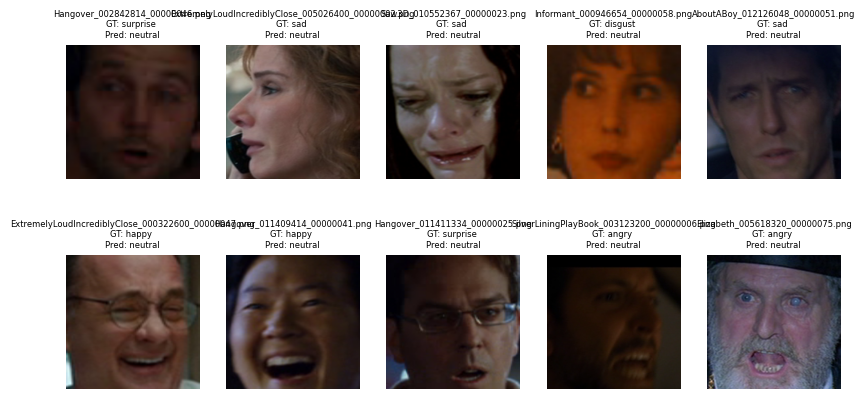

EPOCH: 32  of  150
epoch = 32...in training function


Loss=2.622600959512056e-06 Accuracy=848/913(92.88%) Epoch Avg loss=0.01394604 LR=0.000040: 100%|██████████| 58/58 [00:24<00:00,  2.40it/s]


Test / Val: Average loss: 0.1342, Accuracy: 221/419 (52.74%)

last correct =221 | best correct = 230
EPOCH: 33  of  150
epoch = 33...in training function


Loss=0.004259086679667234 Accuracy=851/913(93.21%) Epoch Avg loss=0.01404863 LR=0.000008: 100%|██████████| 58/58 [00:24<00:00,  2.41it/s]


Test / Val: Average loss: 0.1381, Accuracy: 222/419 (52.98%)

last correct =222 | best correct = 230
-------Early Stopping at epoch 33---
Best model loaded
Validation results with sfew
Test / Val: Average loss: 0.1178, Accuracy: 230/419 (54.89%)



In [26]:
# Training block
print('------ Training started for Non DANN Model ---- ')
print(f'starting LR : {lr}')
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1, " of ", EPOCHS)

    #Train Model
    avg_epoch_loss, curr_lr = train_model_local_lr (model = model,
                                          device = device,
                                          data_loader = data_loader['source']['train'],
                                          optimizer = optimizer,
                                          epoch = epoch,
                                          class_loss_function = criterion_class)
    train_losses.append(avg_epoch_loss)
    lr_schedule.append(curr_lr)

    #Validate Model
    correct, avg_epoch_val_loss = test_model_local(model= model,
                                    device= device,
                                    data_loader = data_loader['source']['val'],
                                    class_loss_function = criterion_class
                                    )

    val_losses.append(avg_epoch_val_loss)
    list_val_correct.append(correct)

    #Adding Scheduler #TODO: ADD SCHEDULER
    scheduler.step(correct) #applying scheduler on accuracy proxy, i.e. correct

    # # Check if the current model has the best validation loss
    # print(f'Last Epoch Val Loss = {avg_epoch_val_loss} | Best Val Loss = {best_val_loss}' )
    # if avg_epoch_val_loss < best_val_loss:
    #   best_val_loss = avg_epoch_val_loss
    #   # save the current model state as the best model state
    #   best_model_state = deepcopy(non_dann_model.state_dict())
    #   print(f'Updated the best model with validation loss: {best_val_loss}\n')

    # check if the current model has the best accuracy
    print (f'last correct ={correct} | best correct = {best_val_acc}')
    if correct > best_val_acc:
      best_val_acc = correct
      # save the current model state as the best model state
      best_model_state = deepcopy(model.state_dict())
      print(f'Updated the best model with correct: {correct}\n')

    list_best_val_correct.append(best_val_acc)

    # early stopping
    # if early_stopping_difference(val_losses,
    #                              patience = early_stop_patience,
    #                              difference= early_stop_difference):
    #   print (f'-------Early Stopping at epoch {epoch+1}---')
    #   epoch_converge = epoch+1
    #   break

    if early_stopping_difference(list_val_correct,
                                 patience = early_stop_patience,
                                 difference= early_stop_difference):
      print (f'-------Early Stopping at epoch {epoch+1}---')
      epoch_converge = epoch+1
      break

    if early_stopping_difference(list_best_val_correct,
                                 patience = 2*early_stop_patience,
                                 difference= 0):
      print (f'-------Early Stopping at epoch {epoch+1}---')
      epoch_converge = epoch+1
      break



    ## showing misclassification images after every 10 epochs
    if epoch % 10 == 0:
      list_misclassified_images = get_misclassified_images_list(model= model,
                                                                device = device,
                                                                test_loader = data_loader['source']['val'],
                                                                num_image = 10)
      plot_misclassified_images(list_misclassified_images)

## using params of best model to update model
if best_model_state: # only update if best model has been saved, else the last one would be picked up
  # best_non_dann_model.load_state_dict(best_model_state)
  best_model.load_state_dict(best_model_state)
  print('Best model loaded')


print(f'Validation results with {source_name}')

correct, test_loss_source = test_model_local(model= best_model, #best_non_dann_model, #non_dann_model,
                                    device= device,
                                    data_loader = data_loader['source']['val'], # source val loader
                                    class_loss_function = criterion_class)


dict_non_dann_losses = {'train_losses' : train_losses,
                                       'val_losses': val_losses,
                                       'test_loss_source' : test_loss_source,
                                      #  'test_loss_target' : test_loss_target,
                                       'epoch_convergence' : epoch_converge,
                                       'lr': lr_schedule}


### Saving Non-Dann Model

In [27]:
target_name = 'expw'
MODEL_DIR = dataconfig.MODEL_DIR
NON_DANN_SFEW_DIR = dataconfig.NON_DANN_SFEW_DIR
SPECIFIC_MODEL_DIR = Path(os.path.join(MODEL_DIR, f'non_dann_{source_name}_{target_name}'))
print(MODEL_DIR, NON_DANN_SFEW_DIR, SPECIFIC_MODEL_DIR)

/content/gdrive/MyDrive/CV_FER/models /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew_expw


In [28]:
model_name = f'non_dann_{source_name}_{target_name}_{str(time.strftime("%d_%m"))}.pt' #"non_dann_sfew_" +str(time.strftime("%d_%m"))+ ".pt"
# dataconfig = DataConfig()
# NON_DANN_SFEW_DIR = dataconfig.NON_DANN_SFEW_DIR
if not SPECIFIC_MODEL_DIR.exists():
    # Create the directory
    SPECIFIC_MODEL_DIR.mkdir(parents=True, exist_ok=True)
    print(f'Directory {SPECIFIC_MODEL_DIR} created successfully.')
else:
    print(f'Directory {SPECIFIC_MODEL_DIR} already exists.')

torch.save(best_model.state_dict(), Path(SPECIFIC_MODEL_DIR,model_name))

Directory /content/gdrive/MyDrive/CV_FER/models/non_dann_sfew_expw already exists.


In [29]:
model_name

'non_dann_sfew_expw_11_04.pt'

In [ ]:
# import torch.nn as nn
# # import torch
# import torch.nn.functional as F

# class SimpleModelv1(nn.Module):
#     def __init__(self,
#                  num_classes = 7,
#                  dropout = 0.1):

#         super(SimpleModelv1, self).__init__()
#         self.num_classes = num_classes

#         #---------------------Feature Extractor Network------------------------#
#         self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1) # 224>224 | 3
#         self.conv2 = nn.Conv2d(in_channels=32,out_channels=64, kernel_size=3, padding= 1) # 224>224 | 5
#         self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2) # 224>112 | 10

#         self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1) # 112>112 | 12
#         self.conv4 = nn.Conv2d(in_channels=128,out_channels=256, kernel_size=3, padding= 1) # 112>112 | 14
#         self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2) # 112>56 | 28

#         self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1) # 56>56 | 30
#         self.conv6 = nn.Conv2d(in_channels=512,out_channels=1024, kernel_size=3, padding= 1) # 56>56 | 32
#         self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2) # 56>28 | 64

#         self.conv7 = nn.Conv2d(in_channels=1024, out_channels=2048, kernel_size=3, padding=1) # 28>28 | 66
#         self.conv8 = nn.Conv2d(in_channels=2048,out_channels=2048, kernel_size=3, padding= 1) # 28>28 | 68
#         self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2) # 28>14 | 136

#         self.conv9 = nn.Conv2d(in_channels=2048, out_channels=512, kernel_size=3, padding=1) # 14>14 | 138
#         self.conv10 = nn.Conv2d(in_channels=512,out_channels=128, kernel_size=3, padding= 1) # 14>14 | 140
#         self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2) # 14>7 | 280

#         self.conv11 = nn.Conv2d(in_channels=128, out_channels=32, kernel_size=3) # 7>5 | 282
#         self.conv12 = nn.Conv2d(in_channels=32,out_channels=16, kernel_size=3) # 5>3 | 284
#         self.conv13 = nn.Conv2d(in_channels=16,out_channels=self.num_classes, kernel_size=3) # 3>1x1xnum_classes | 286

#         # #---------------------Class (Task) Classifier Network------------------------#

#         # class_classifier_layers = [nn.ReLU(),
#         #                            nn.Dropout(p=dropout),
#         #                            nn.Linear(1280,100),
#         #                            nn.ReLU(),
#         #                            nn.Dropout(p=dropout)]

#         # class_classifier_layers.extend([nn.ReLU(),
#         #                                 nn.Dropout(p=dropout),
#         #                                 nn.Linear(100,num_classes)])

#         # self.class_classifier = nn.Sequential(*class_classifier_layers)
#         # print (self.class_classifier)

#     def forward(self, x):
#         x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x)))))
#         # print("after first max pool, shape :", x.shape)
#         x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
#         # print("after second max pool, shape :", x.shape)
#         x = self.pool3(F.relu(self.conv6(F.relu(self.conv5(x)))))
#         # print("after third max pool, shape :", x.shape)
#         x = self.pool4(F.relu(self.conv8(F.relu(self.conv7(x)))))
#         # print("after fourth max pool, shape :", x.shape)
#         x = self.pool5(F.relu(self.conv10(F.relu(self.conv9(x)))))
#         # print("after fifth max pool, shape :", x.shape)
#         x = self.conv13(F.relu(self.conv12(F.relu(self.conv11(x)))))
#         # print("after convolution shape :", x.shape)

#         x = x.view(-1, self.num_classes)
#         # print("after reshaping - view shape :", x.shape)
#         return x
#         # return F.log_softmax(x, dim=1)

In [ ]:
# import torch
# import torch.nn as nn
# import torchvision.models as models

# class SimpleModelv2(nn.Module):
#     def __init__(self,
#                  num_classes = 7,
#                  dropout = 0.1):

#         super(SimpleModelv2, self).__init__()

#         self.num_classes = num_classes
#         resnet = models.resnet50(pretrained=True)
#         num_features = resnet.fc.in_features
#         resnet.fc = nn.Linear(num_features, num_classes)
#         self.resnet = resnet

#     def forward(self, x):
#         x = self.resnet(x)
#         return x,x,x

In [ ]:
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")
# print(device)

In [ ]:
# model = SimpleModelv2().to(device=device)

#### Model params

In [ ]:
# !pip install torchsummary
# from torchsummary import summary
# summary(model, input_size=(3, 224, 224))

In [ ]:
# print(model)

#### Running Model for single Run

In [ ]:
# for usage, dict_data_loader in data_loader.items(): ## {'source' : sfew_loader,'target' : expw_loader}
#     print('-'*80)
#     print(usage)
#     for k, v in dict_data_loader.items(): # {'name': 'sfew','train':sfew_train_loader,'val':sfew_val_loader}
#       if k == 'name':
#         print (f'--------{k} of dataset : {v}--------')
#       else:
#         print (f'   --------type : {k}--------')
#         batch = next(iter(v)) # it may be possible that some datasets have more than 2 outputs, so this strategy is safe
#         images, labels = batch[0].to(device), batch[1].to(device)
#         print( "Input:\n","Input Image: ",images.shape, ", labels: ",labels.shape)
#         print("Input labels:\n", labels)
#         print("Input labels - index", labels.argmax(dim=1))

#         x_labels, _ , _ = model(images) # forward pass
#         print("Output:\n", "labels shape: ", x_labels.shape)
#         print("Output labels:\n", x_labels)
#         print("Output labels - index", x_labels.argmax(dim=1))


## Training and Testing

In [ ]:
# from tqdm import tqdm
# import torch.nn.functional as F

### Train Function Without LR

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision.transforms import ToTensor
# from torch.utils.data import DataLoader

# def train_model_local_lr(model, train_loader, criterion, optimizer, device='cuda'):
#     model.to(device)
#     model.train()


#     # for epoch in range(num_epochs):
#     running_loss = 0.0
#     correct = 0

#     for inputs, labels,_ in train_loader:
#         inputs = inputs * 255.0  # Convert inputs from [0, 1] to [0, 255]
#         inputs = inputs.to(device)
#         labels = labels.to(device)

#         optimizer.zero_grad()

#         outputs,_,_ = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * inputs.size(0)
#         correct += get_correct_preds(outputs, labels)


#     epoch_loss = running_loss / len(train_loader.dataset)
#     length_dataset = len(train_loader.dataset)
#     print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy : {correct}/{length_dataset} Or {100. * correct / length_dataset: .2f} %')




# def train_model_local_lr(model,device, data_loader, optimizer, epoch,
#                 class_loss_function = nn.CrossEntropyLoss() ):
#     print(f'epoch = {epoch+1}...in training function')
#     model.to(device)
#     model.train() # setting model to training


#     pbar = tqdm(data_loader) # putting the dataloader in progress bar

#     processed = 0 # to understand accuracy, used in denominator
#     epoch_loss = 0.0
#     correct = 0

#     for batch_idx, batch in enumerate(pbar):
#         images, labels = batch[0].to(device), batch[1].to(device) # batch of images and labels

#         optimizer.zero_grad() # setting gradients to zero to avoid accumulation

#         class_output, _ , _ = model(images) # forward pass, output = {class, domain, feature}

#         class_loss = class_loss_function(class_output,labels) # Calculate Loss
#         epoch_loss += class_loss.item()
#         # Sum up batch correct predictions
#         correct += get_correct_preds(class_output, labels)

#         class_loss.backward() #backpropogation, creating gradients

#         optimizer.step() # updating the params

#         processed += len(images)
#         curr_lr = optimizer.param_groups[0]['lr']

#         pbar.set_description(desc= f'Loss={class_loss.item()} Accuracy={correct}/{processed}({100*correct/processed:0.2f}%) Epoch Avg loss={epoch_loss/processed:0.8f} LR={curr_lr:0.6f}')

#     return float("{:.8f}".format(epoch_loss/processed)),  curr_lr



### Test Function

In [ ]:

# def test_model_local(model, device, data_loader, mode= 'test',
#                class_loss_function = nn.CrossEntropyLoss() ):
#     model.eval() # evaluation mode

#     # variables to track loss and accuracy
#     test_loss = 0.0
#     correct = 0

#     # Disable gradient updation
#     with torch.no_grad():
#         # Iterate over each batch and fetch images and labels from the batch
#         for batch_idx, batch in enumerate(data_loader):
#             images, labels = batch[0].to(device), batch[1].to(device)

#             class_output,_,_  = model((images*255)) # forward pass, output = {class}
#             class_loss = class_loss_function(class_output,labels) # Calculate Loss

#             test_loss += class_loss.item() # sum up batch loss

#             # Sum up batch correct predictions
#             correct += get_correct_preds(class_output, labels)

#     # Calculate test loss for a epoch
#     test_loss /= len(data_loader.dataset)

#     print('Test / Val: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(test_loss, correct, len(data_loader.dataset),
#         100. * correct / len(data_loader.dataset)))


#     return correct, test_loss


### Execution

In [ ]:
# runconfig = RunConfig()
# device = runconfig.device
# model = SimpleModelv2().to(device=device)
# best_model = SimpleModelv2().to(device=device)


# #learning rate
# lr =  0.01 #float(runconfig.inital_lr)

# # Epochs
# EPOCHS = runconfig.NUM_EPOCHS
# # EPOCHS = 5 #override
# print("EPOCHS", EPOCHS)

# # ReduceLRonPlateau Scheduler Params
# scheduler_patience = 8 #runconfig.scheduler_patience
# scheduler_factor = runconfig.scheduler_factor
# scheduler_threshold = 25 #runconfig.scheduler_threshold

# # Early stopping params
# early_stop_patience = 10 #runconfig.early_stop_patience
# early_stop_difference = 15 #runconfig.early_stop_difference

# # optimizer
# optimizer = optim.SGD(model.parameters(), lr = lr, momentum = 0.9)

# #optimizer with weight decay (L2 regularization)
# # optimizer = optim.SGD(non_dann_model.parameters(), lr = lr, momentum = 0.9, weight_decay= 0.0001)

# # Set up the ReduceLROnPlateau scheduler
# scheduler = ReduceLROnPlateau(optimizer,
#                               # mode='min',
#                               mode='max',
#                               factor=scheduler_factor,
#                               patience=scheduler_patience,
#                               threshold = scheduler_threshold,
#                               threshold_mode='abs',
#                               min_lr=1e-6,
#                               verbose= True)

# # Initialize variables to track the best validation loss and the best model state
# best_val_loss = float('inf')
# best_val_acc = 0
# best_model_state = None

# # loss functions
# criterion_class = (runconfig.criterion_class).to(device=device)
# # criterion_domain = (runconfig.criterion_domain).to(device=device)

# # loss accumulation
# train_losses = [] # to capture train losses over training epochs
# val_losses = [] # to capture validation loss over epochs
# lr_schedule = [] # to capture learning rate over epochs
# epoch_converge = 0 #TODO: run config based
# list_val_correct = [] # to capture validation accuracy over epochs
# list_best_val_correct = [] # to capture best validtion accuracy over epochs

In [ ]:
# # Training block
# print('------ Training started for Non DANN Model ---- ')
# print(f'starting LR : {lr}')
# for epoch in range(EPOCHS):
#     print("EPOCH:", epoch+1, " of ", EPOCHS)

#     #Train Model
#     avg_epoch_loss, curr_lr = train_model(model = model,
#                                           device = device,
#                                           data_loader = data_loader['source']['train'],
#                                           optimizer = optimizer,
#                                           epoch = epoch,
#                                           class_loss_function = criterion_class)
#     train_losses.append(avg_epoch_loss)
#     lr_schedule.append(curr_lr)

#     #Validate Model
#     correct, avg_epoch_val_loss = test_model(model= model,
#                                     device= device,
#                                     data_loader = data_loader['source']['val'],
#                                     class_loss_function = criterion_class
#                                     )

#     val_losses.append(avg_epoch_val_loss)
#     list_val_correct.append(correct)

#     #Adding Scheduler #TODO: ADD SCHEDULER
#     scheduler.step(correct) #applying scheduler on accuracy proxy, i.e. correct

#     # # Check if the current model has the best validation loss
#     # print(f'Last Epoch Val Loss = {avg_epoch_val_loss} | Best Val Loss = {best_val_loss}' )
#     # if avg_epoch_val_loss < best_val_loss:
#     #   best_val_loss = avg_epoch_val_loss
#     #   # save the current model state as the best model state
#     #   best_model_state = deepcopy(non_dann_model.state_dict())
#     #   print(f'Updated the best model with validation loss: {best_val_loss}\n')

#     # check if the current model has the best accuracy
#     print (f'last correct ={correct} | best correct = {best_val_acc}')
#     if correct > best_val_acc:
#       best_val_acc = correct
#       # save the current model state as the best model state
#       best_model_state = deepcopy(model.state_dict())
#       print(f'Updated the best model with correct: {correct}\n')

#     list_best_val_correct.append(best_val_acc)

#     # early stopping
#     # if early_stopping_difference(val_losses,
#     #                              patience = early_stop_patience,
#     #                              difference= early_stop_difference):
#     #   print (f'-------Early Stopping at epoch {epoch+1}---')
#     #   epoch_converge = epoch+1
#     #   break

#     if early_stopping_difference(list_val_correct,
#                                  patience = early_stop_patience,
#                                  difference= early_stop_difference):
#       print (f'-------Early Stopping at epoch {epoch+1}---')
#       epoch_converge = epoch+1
#       break

#     if early_stopping_difference(list_best_val_correct,
#                                  patience = 2*early_stop_patience,
#                                  difference= 0):
#       print (f'-------Early Stopping at epoch {epoch+1}---')
#       epoch_converge = epoch+1
#       break



#     ## showing misclassification images after every 10 epochs
#     if epoch % 10 == 0:
#       list_misclassified_images = get_misclassified_images_list(model= model,
#                                                                 device = device,
#                                                                 test_loader = data_loader['source']['val'],
#                                                                 num_image = 10)
#       plot_misclassified_images(list_misclassified_images)

# ## using params of best model to update model
# if best_model_state: # only update if best model has been saved, else the last one would be picked up
#   # best_non_dann_model.load_state_dict(best_model_state)
#   best_model.load_state_dict(best_model_state)
#   print('Best model loaded')


# print(f'Validation results with {source_name}')

# correct, test_loss_source = test_model(model= best_model, #best_non_dann_model, #non_dann_model,
#                                     device= device,
#                                     data_loader = data_loader['source']['val'], # source val loader
#                                     class_loss_function = criterion_class)


# dict_non_dann_losses = {'train_losses' : train_losses,
#                                        'val_losses': val_losses,
#                                        'test_loss_source' : test_loss_source,
#                                        'test_loss_target' : test_loss_target,
#                                        'epoch_convergence' : epoch_converge,
#                                        'lr': lr_schedule}


In [ ]:
# fig, axs = plt.subplots(2,2,figsize=(15,10))
# axs[0, 0].plot([t_items.item() for t_items in dict_non_dann_losses['train_losses']])
# axs[0, 0].set_title("Training Loss")
# axs[1, 0].plot([t_items.item() for t_items in dict_non_dann_losses['train_losses']])
# axs[1, 0].set_title("WIP Training Accuracy")
# axs[0, 1].plot(dict_non_dann_losses['val_losses'])
# axs[0, 1].set_title("Test Loss")
# axs[1, 1].plot(dict_non_dann_losses['val_losses'])
# axs[1, 1].set_title("WIP Test Accuracy")